<a href="https://colab.research.google.com/github/anamika1302/CS-541-NER-SARK_NLP/blob/main/Entities_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_ner = pd.read_csv("/content/drive/MyDrive/umass_ner/train_combine_ner.csv", sep = "|",index_col=0)

In [ ]:
df_ner

,file_id,standoff_id,entity,begin,end,chunk
0,101,T1,Tobacco,16,19,Tob
1,101,T2,StatusTime,20,23,(-)
2,101,T3,Alcohol,25,29,EtOH
3,101,T4,StatusTime,25,29,EtOH
4,101,T5,Amount,32,39,a glass
...,...,...,...,...,...,...
16034,4884,T9,Employment,555,561,worked
16035,4884,T10,Duration,562,574,for 18 years
16036,4884,T11,Type,578,593,a grocery store
16037,4884,T12,StatusEmploy,603,614,not worked


[Text(0, 0, 'Tobacco'),
 Text(0, 0, 'StatusTime'),
 Text(0, 0, 'Alcohol'),
 Text(0, 0, 'Amount'),
 Text(0, 0, 'Frequency'),
 Text(0, 0, 'Drug'),
 Text(0, 0, 'Type'),
 Text(0, 0, 'LivingStatus'),
 Text(0, 0, 'TypeLiving'),
 Text(0, 0, 'Employment'),
 Text(0, 0, 'StatusEmploy'),
 Text(0, 0, 'Method'),
 Text(0, 0, 'Duration'),
 Text(0, 0, 'History')]

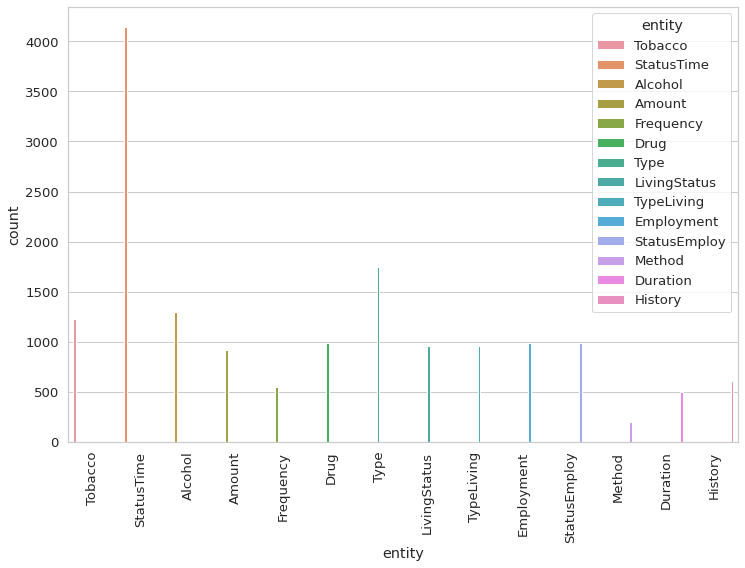

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "entity", hue = "entity" , data = df_ner)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
df_re = pd.read_csv("/content/drive/MyDrive/umass_ner/train_combine_relation.csv", sep = "|",index_col=0)
df_re

,file_id,relation_tag,entity1_standoff_id,relation,entity1,entity1_begin,entity1_end,chunk1,entity2_standoff_id,entity2,entity2_begin,entity2_end,chunk2
0,101,E1,T1,Status,Tobacco,16,19,Tob,T2,StatusTime,20,23,(-)
1,101,E2,T3,Status,Alcohol,25,29,EtOH,T4,StatusTime,25,29,EtOH
2,101,E2,T3,Amount,Alcohol,25,29,EtOH,T5,Amount,32,39,a glass
3,101,E2,T3,Frequency,Alcohol,25,29,EtOH,T6,Frequency,48,58,1-2x/month
4,101,E2,T3,Type,Alcohol,25,29,EtOH,T10,Type,43,47,wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10928,4884,E2,T7,Status,Employment,482,486,SSDI,T8,StatusEmploy,482,486,SSDI
10929,4884,E3,T9,Duration,Employment,555,561,worked,T10,Duration,562,574,for 18 years
10930,4884,E3,T9,Type,Employment,555,561,worked,T11,Type,578,593,a grocery store
10931,4884,E3,T9,Status,Employment,555,561,worked,T12,StatusEmploy,603,614,not worked


In [ ]:

df_re.groupby(['entity1','entity2']).size()

entity1       entity2     
Alcohol       Amount           322
              Duration          85
              Frequency        326
              History          148
              StatusTime      1294
              Type             195
Drug          Amount            10
              Duration          23
              Frequency         24
              History          100
              Method           195
              StatusTime       986
              Type             685
Employment    Duration          49
              History           49
              StatusEmploy     981
              Type             708
LivingStatus  Duration          37
              History           19
              StatusTime       959
              TypeLiving       959
Tobacco       Amount           586
              Duration         301
              Frequency        196
              History          304
              Method             5
              StatusTime      1232
              Type          

[Text(0, 0, 'Status'),
 Text(0, 0, 'Amount'),
 Text(0, 0, 'Frequency'),
 Text(0, 0, 'Type'),
 Text(0, 0, 'Method'),
 Text(0, 0, 'Duration'),
 Text(0, 0, 'History'),
 Text(0, 0, 'Type2'),
 Text(0, 0, 'Type3'),
 Text(0, 0, 'Amount2'),
 Text(0, 0, 'Duration2'),
 Text(0, 0, 'Frequency2'),
 Text(0, 0, 'Status2'),
 Text(0, 0, 'History2'),
 Text(0, 0, 'Amount3'),
 Text(0, 0, 'Method2')]

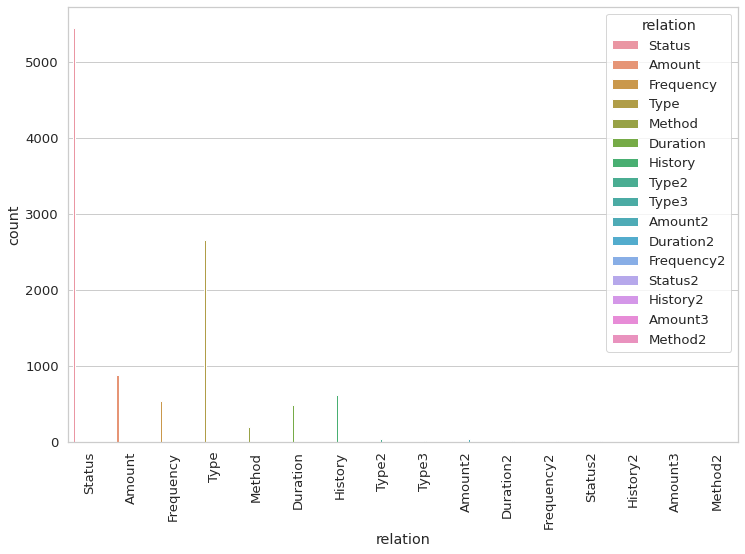

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "relation", hue = "relation" , data = df_re)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [ ]:
duplicate = df_ner[df_ner.duplicated(['file_id', 'begin', 'end'], keep = False)]
duplicate.iloc[0:,]

,file_id,standoff_id,entity,begin,end,chunk
2,101,T3,Alcohol,25,29,EtOH
3,101,T4,StatusTime,25,29,EtOH
6,101,T7,Drug,60,64,IVDU
8,101,T9,Type,60,64,IVDU
10,101,T11,LivingStatus,70,75,lives
...,...,...,...,...,...,...
16015,4883,T14,History,295,308,until lay off
16024,4883,T23,Alcohol,446,462,morning drinking
16025,4883,T24,StatusTime,446,462,morning drinking
16032,4884,T7,Employment,482,486,SSDI


In [ ]:
df_ner.entity.unique()

array(['Tobacco', 'StatusTime', 'Alcohol', 'Amount', 'Frequency', 'Drug',
       'Type', 'LivingStatus', 'TypeLiving', 'Employment', 'StatusEmploy',
       'Method', 'Duration', 'History'], dtype=object)

In [ ]:
duplicate.entity.unique()

array(['Alcohol', 'StatusTime', 'Drug', 'Type', 'LivingStatus',
       'Employment', 'Tobacco', 'StatusEmploy', 'History', 'Amount',
       'Duration', 'Method', 'Frequency', 'TypeLiving'], dtype=object)

In [ ]:
df_ner_model1 = df_ner.loc[df_ner['entity'].isin(['Duration','History','Type','Amount','Frequency'])]

In [ ]:
df_ner_model1.to_csv("/content/drive/MyDrive/umass_ner/train_ner_model1.csv", sep = "|",index = False)

[Text(0, 0, 'Amount'),
 Text(0, 0, 'Frequency'),
 Text(0, 0, 'Type'),
 Text(0, 0, 'Duration'),
 Text(0, 0, 'History')]

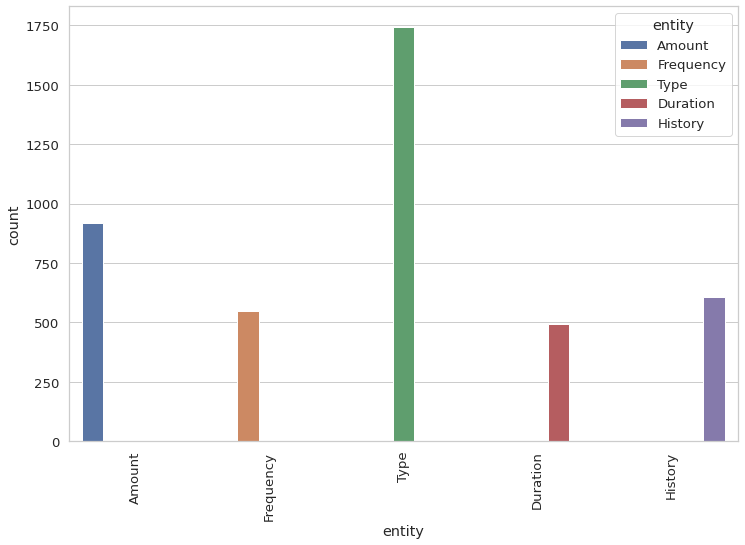

In [ ]:
plt.figure(figsize = (12,8))
sns.set(style = "whitegrid",font_scale = 1.2)
chart = sns.countplot(x = "entity", hue = "entity" , data = df_ner_model1)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)